1. Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.
2. Задание 2: (опция). Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [5]:
def gb_predict(X, trees_list, coef_list, eta):
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [6]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [7]:
def bias(y, z):
    return (y - z)

In [8]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []

    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [9]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    train_prediction = gb_predict(X_train, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {round(train_errors[-1], 4)}')

    test_prediction = gb_predict(X_test, trees, coefs, eta)

    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {round(test_errors[-1], 4)}')

In [12]:
import matplotlib.pyplot as plt

In [19]:
def get_error_plot(n_trees, train_err, test_err):
    plt.xlabel('N_trees')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 6506.9811
Ошибка алгоритма из 10 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 6454.7886


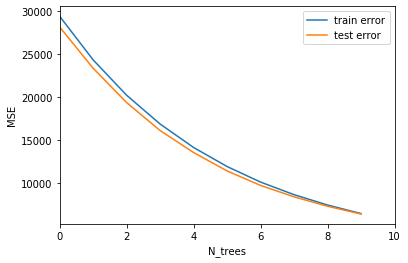

Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 2551.1012
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3333.7491


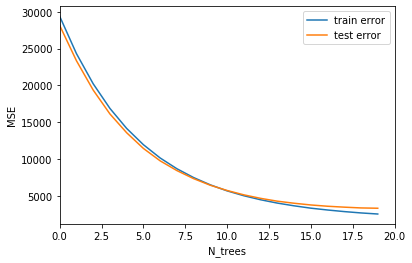

Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 1363.3011
Ошибка алгоритма из 50 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3304.1937


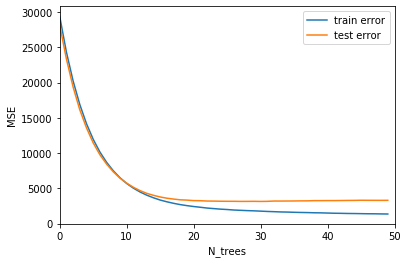

Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 829.7349
Ошибка алгоритма из 100 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 3561.9747


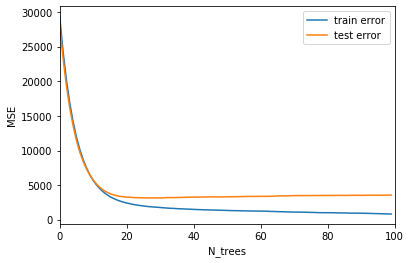

In [20]:
eta = 0.1
max_depth = 3
trees_list = [10, 20, 50, 100]
for i in trees_list:
    n_trees = i
    coefs = [1] * n_trees
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 5577.8014
Ошибка алгоритма из 10 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 6400.1919


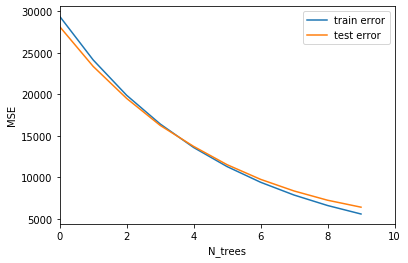

Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 1403.8591
Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3396.3071


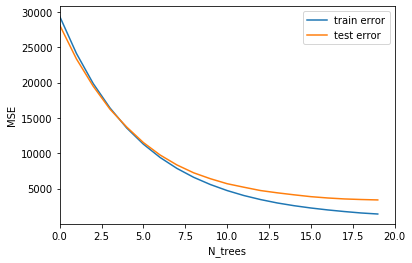

Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 312.2068
Ошибка алгоритма из 50 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3535.2101


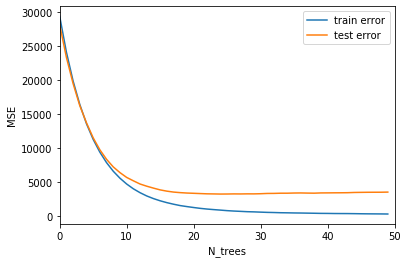

Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 48.8743
Ошибка алгоритма из 100 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 3791.1251


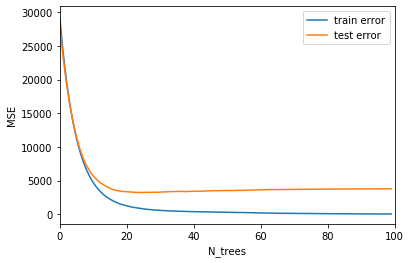

In [21]:
eta = 0.1
max_depth = 5
trees = [10, 20, 50, 100]
for i in trees:
    n_trees = i
    coefs = [1] * n_trees
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 4872.6237
Ошибка алгоритма из 10 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 7446.1916


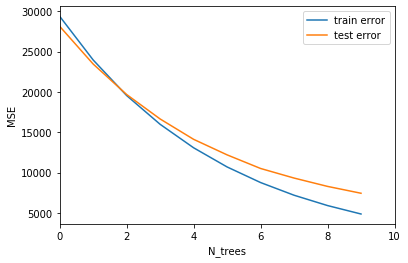

Ошибка алгоритма из 20 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 826.6135
Ошибка алгоритма из 20 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 4104.2397


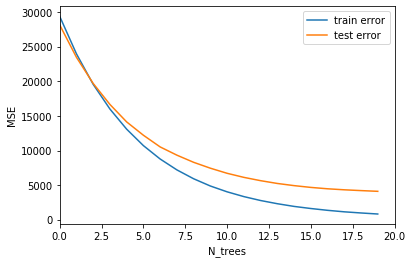

Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 20.45
Ошибка алгоритма из 50 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 3718.8695


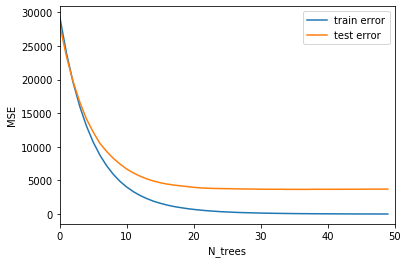

Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.1 на тренировочной выборке: 1.2094
Ошибка алгоритма из 100 деревьев глубиной 7     с шагом 0.1 на тестовой выборке: 3753.4061


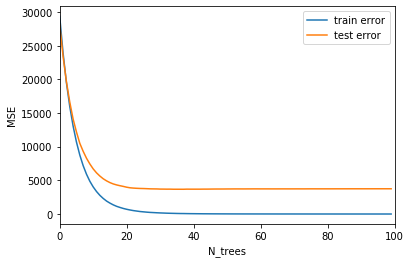

In [22]:
eta = 0.1
max_depth = 7
trees = [10, 20, 50, 100]
for i in trees:
    n_trees = i
    coefs = [1] * n_trees
    trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
    get_error_plot(n_trees, train_errors, test_errors)

делам вывод, что с увеличением глубины дерева, модель показывает хорошие данные на тренировочной выбрке, но при это переучивается и на тесте показатели ухудшаются.